In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [67]:
loan.shape

(1137, 111)

In [4]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                      

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [6]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                       int64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [7]:
loan.describe(include = object)

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,...,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,1137,1137,1137,1137,1078,1116,1137,1137,1137,1137,...,1137,1137,1137,1137,1137,1137,1136,87,1137,1137
unique,2,34,7,34,1036,11,3,3,1,3,...,599,401,43,272,602,1,53,2,52,1
top,36 months,11.71%,B,B3,Kaiser Permanente,10+ years,RENT,Verified,Dec-11,Fully Paid,...,Debt Consolidation Loan,606xx,CA,Apr-00,74.90%,f,Dec-14,Jun-16,May-16,INDIVIDUAL
freq,811,98,400,98,4,253,680,418,1137,848,...,113,19,224,19,8,1137,194,86,382,1137


In [8]:
loan.describe(include = np.number)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.137000e+03,1.137000e+03,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,...,0.0,0.0,0.0,0.0,1137.000000,1137.0,0.0,0.0,0.0,0.0
mean,1.059361e+06,1.290856e+06,12847.185576,12351.385224,12297.503690,369.638795,61820.569129,14.583351,0.071240,0.857520,...,NaN,NaN,NaN,NaN,0.014072,0.0,NaN,NaN,NaN,NaN
std,1.566701e+04,2.044511e+04,7505.471287,6850.604023,6797.283309,199.833760,31611.612310,6.199288,0.337281,0.933963,...,NaN,NaN,NaN,NaN,0.117840,0.0,NaN,NaN,NaN,NaN
min,7.659270e+05,9.431350e+05,1000.000000,1000.000000,1000.000000,33.940000,12000.000000,0.720000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,1.057674e+06,1.288986e+06,7100.000000,7100.000000,7100.000000,223.970000,40000.000000,10.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,1.061060e+06,1.292586e+06,11875.000000,11100.000000,11000.000000,339.310000,55000.000000,14.630000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,1.064830e+06,1.298549e+06,17000.000000,16000.000000,16000.000000,474.760000,75000.000000,19.550000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1243.850000,276000.000000,29.850000,3.000000,5.000000,...,NaN,NaN,NaN,NaN,1.000000,0.0,NaN,NaN,NaN,NaN


In [9]:
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
                              ... 
tax_liens                        0
tot_hi_cred_lim               1137
total_bal_ex_mort             1137
total_bc_limit                1137
total_il_high_credit_limit    1137
Length: 111, dtype: int64

In [68]:
loan.columns[loan.isnull().sum()/len(loan) *100 == 100]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [69]:
loan = loan.drop(loan.columns[loan.isnull().sum()/loan.shape[0] *100 == 100],axis=1)

In [70]:
loan.shape

(1137, 57)

In [71]:
loan.isnull().sum()/len(loan)*100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.189094
emp_length                     1.846966
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          43.095866
purpose                        0.000000
title                          0.000000
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [72]:
loan = loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)

In [73]:
loan.shape

(1137, 54)

In [74]:
loan.columns[loan.isnull().sum()/len(loan)*100!=0]

Index(['emp_title', 'emp_length', 'desc', 'last_pymnt_d'], dtype='object')

In [75]:
loan['emp_title'].value_counts()

Kaiser Permanente                          4
Bank of America                            3
United States Air Force                    3
US Bank                                    3
Department of Defense                      3
                                          ..
Regal Cinemas                              1
Fortress Analytics, Inc.                   1
vons                                       1
BLUE CROSS BLUE SHIELD OF MASSACHUSETTS    1
Level 3 Communications                     1
Name: emp_title, Length: 1036, dtype: int64

In [76]:
loan['emp_length'].value_counts()

10+ years    253
2 years      130
5 years      115
3 years      106
4 years      102
< 1 year      96
1 year        93
6 years       71
7 years       64
8 years       47
9 years       39
Name: emp_length, dtype: int64

In [77]:
loan['last_pymnt_d'].value_counts().head()

Dec-14    194
Jan-15    152
May-16     81
Dec-13     34
Oct-13     32
Name: last_pymnt_d, dtype: int64

In [78]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [79]:
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')

In [80]:
loan['last_pymnt_d']=pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')

In [81]:
loan['last_credit_pull_d']=pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')

In [82]:
loan.loc[:,['issue_d','last_pymnt_d','last_credit_pull_d']].head(1)

,issue_d,last_pymnt_d,last_credit_pull_d
0,2011-12-01,2015-01-01,2016-05-01


In [83]:
loan['revol_util'] = loan['revol_util'].str.replace('%',' ')

In [84]:
loan['revol_util'] = loan['revol_util'].astype(float)

In [85]:
loan['int_rate'] = loan['int_rate'].str.replace('%',' ')

In [86]:
loan['int_rate'] = loan['int_rate'].astype(float)

In [87]:
loan['id'] = loan['id'].astype(object)
loan['member_id'] = loan['member_id'].astype(object)

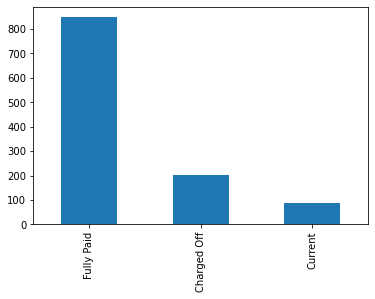

In [88]:
loan['loan_status'].value_counts().plot(kind='bar')
plt.show()

In [31]:
loan['loan_status'].value_counts()

# not balanced data

Fully Paid     848
Charged Off    202
Current         87
Name: loan_status, dtype: int64

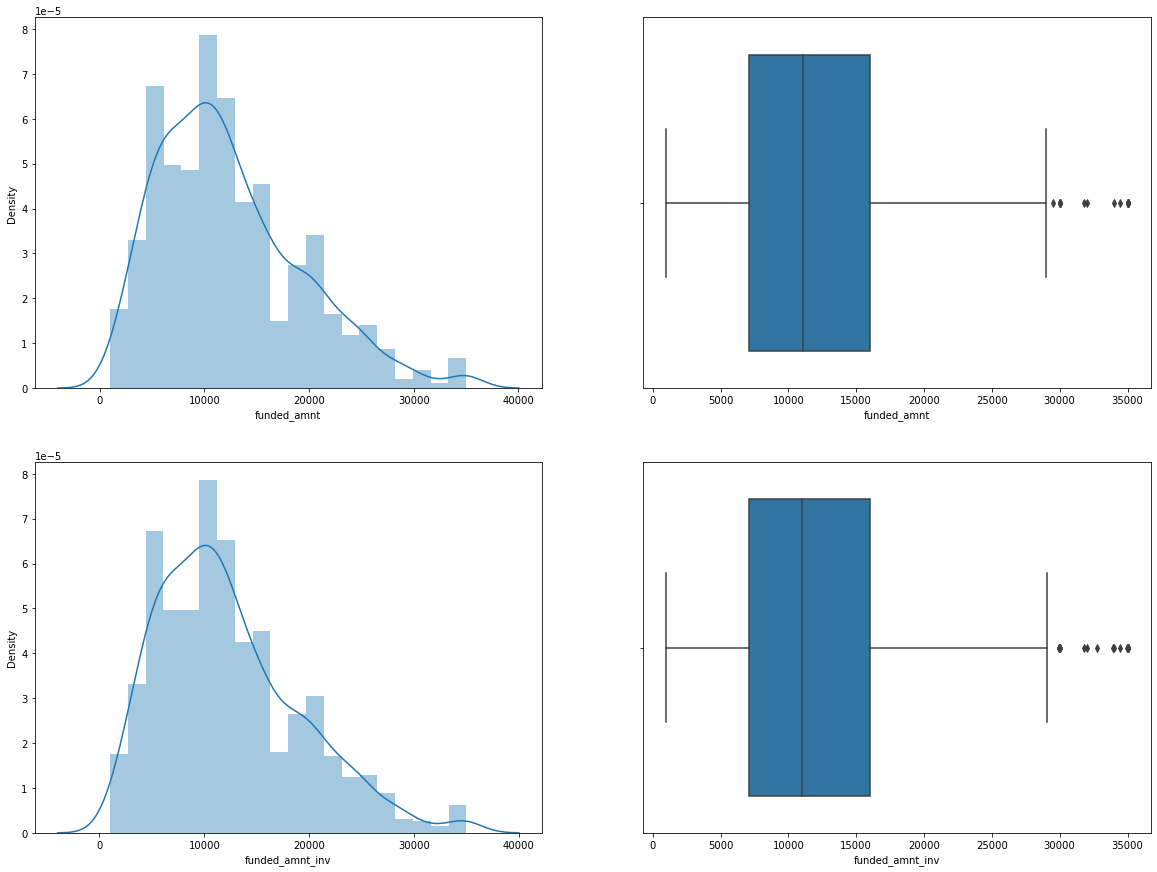

In [89]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(loan['funded_amnt'])
plt.subplot(2,2,2)
sns.boxplot(loan['funded_amnt'])
plt.subplot(2,2,3)
sns.distplot(loan['funded_amnt_inv'])
plt.subplot(2,2,4)
sns.boxplot(loan['funded_amnt_inv'])
plt.show()

In [90]:
loan['loan_amnt'].skew()

0.9433100230362576

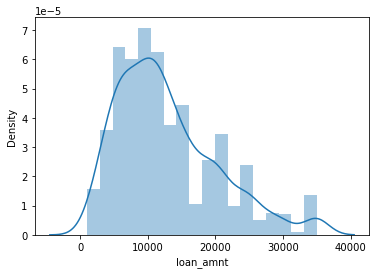

In [91]:
sns.distplot(loan['loan_amnt'])
plt.show()

skew -0.5386216388771545


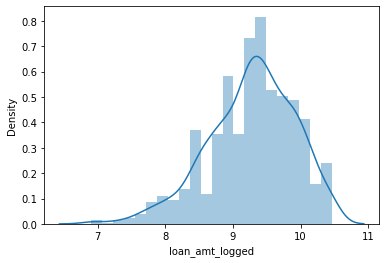

In [92]:
loan['loan_amt_logged'] = np.log(loan['loan_amnt'])
print('skew',loan['loan_amt_logged'].skew())
sns.distplot(loan['loan_amt_logged'])
plt.show()

In [93]:
loan.describe(include='object')

,id,member_id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
count,1137,1137,1137,1137,1137,1078,1116,1137,1137,1137,1137,1137,647,1137,1137,1137,1137,1137,1137,1137
unique,1137,1137,2,7,34,1036,11,3,3,3,1,1137,646,13,599,401,43,272,1,1
top,1064958,1292287,36 months,B,B3,Kaiser Permanente,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/06/11 > Debt consolidat...,debt_consolidation,Debt Consolidation Loan,606xx,CA,Apr-00,f,INDIVIDUAL
freq,1,1,811,400,98,4,253,680,418,848,1137,1,2,598,113,19,224,19,1137,1137


In [94]:
loan.describe(include='object')

,id,member_id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,application_type
count,1137,1137,1137,1137,1137,1078,1116,1137,1137,1137,1137,1137,647,1137,1137,1137,1137,1137,1137,1137
unique,1137,1137,2,7,34,1036,11,3,3,3,1,1137,646,13,599,401,43,272,1,1
top,1064958,1292287,36 months,B,B3,Kaiser Permanente,10+ years,RENT,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/06/11 > Debt consolidat...,debt_consolidation,Debt Consolidation Loan,606xx,CA,Apr-00,f,INDIVIDUAL
freq,1,1,811,400,98,4,253,680,418,848,1137,1,2,598,113,19,224,19,1137,1137


In [95]:
loan['term'].value_counts()

 36 months    811
 60 months    326
Name: term, dtype: int64

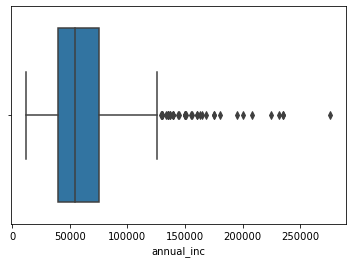

In [98]:
sns.boxplot(loan['annual_inc'])
plt.show()

In [99]:
loan['annual_inc_trans'] = np.log(loan['annual_inc'])

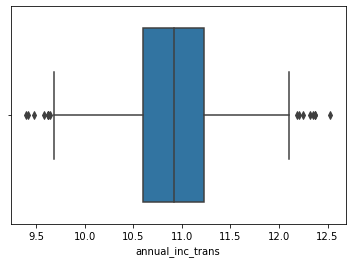

In [101]:
sns.boxplot(loan['annual_inc_trans'])
plt.show()

In [110]:
Q1 = loan['annual_inc_trans'].quantile(0.25)
Q3 = loan['annual_inc_trans'].quantile(0.75)

IQR = Q3 - Q1

UB = Q3 + 2*IQR
LB = Q1 - 2*IQR
print(UB,LB)

12.482460711363196 9.339417414251324


In [111]:
outliers = loan[(loan['annual_inc_trans']>UB) | (loan['annual_inc_trans']<LB)]
outliers

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amt_logged,annual_inc_trans
392,1064548,1298574,5000,5000,5000.0,36 months,6.62,153.52,A,A2,...,0,1,INDIVIDUAL,0,0,0,0,0,8.517193,12.528156


In [114]:
def inc_ranges(x):
    if x>0 and x<40000:
        return '0-40k'
    elif x>=40000 and x<60000:
        return '40-60k'
    elif x>=60000 and x<80000:
        return '60-80k'
    elif x>=80000 and x<120000:
        return '80-120k'
    else:
        return '120k above'

In [115]:
loan['annual_inc_trans'] = loan['annual_inc'].apply(inc_ranges)

In [116]:
loan['annual_inc_trans'].value_counts()

40-60k        356
0-40k         263
60-80k        254
80-120k       202
120k above     62
Name: annual_inc_trans, dtype: int64

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [60]:
loan['grade'].value_counts()

B    400
C    238
A    225
D    157
E     83
F     29
G      5
Name: grade, dtype: int64

In [61]:
loan['grade']=le.fit_transform(loan['grade'])

In [62]:
loan['grade'].value_counts()

1    400
2    238
0    225
3    157
4     83
5     29
6      5
Name: grade, dtype: int64

In [53]:
loan['home_ownership'] = loan['home_ownership'].map(loan['home_ownership'].value_counts(normalize=True))

In [54]:
loan['home_ownership'] = loan['home_ownership'].replace(loan['home_ownership'].value_counts(normalize=True))

In [55]:
loan['home_ownership'] .value_counts()

0.598065    680
0.324538    369
0.077397     88
Name: home_ownership, dtype: int64

In [118]:
loan.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_amt_logged
loan_amnt,1.000000,0.960561,0.958142,0.291574,0.888110,0.410305,0.081571,-0.017925,0.015389,0.143736,...,0.111392,0.416227,NaN,NaN,NaN,NaN,NaN,-0.050342,NaN,0.927761
funded_amnt,0.960561,1.000000,0.998432,0.249771,0.951430,0.382697,0.074593,-0.041627,0.023196,0.128452,...,0.101185,0.418052,NaN,NaN,NaN,NaN,NaN,-0.074283,NaN,0.917576
funded_amnt_inv,0.958142,0.998432,1.000000,0.246215,0.952887,0.381305,0.073290,-0.041583,0.021539,0.129478,...,0.099235,0.418259,NaN,NaN,NaN,NaN,NaN,-0.074028,NaN,0.916305
int_rate,0.291574,0.249771,0.246215,1.000000,0.184953,0.096745,0.099564,0.130406,0.248295,0.114917,...,0.115655,0.160450,NaN,NaN,NaN,NaN,NaN,0.087387,NaN,0.254128
installment,0.888110,0.951430,0.952887,0.184953,1.000000,0.374486,0.060594,-0.040289,0.020121,0.116188,...,0.059171,0.372564,NaN,NaN,NaN,NaN,NaN,-0.076625,NaN,0.865001
annual_inc,0.410305,0.382697,0.381305,0.096745,0.374486,1.000000,-0.217441,0.080150,0.002231,0.273157,...,0.033637,0.212785,NaN,NaN,NaN,NaN,NaN,-0.036704,NaN,0.336799
dti,0.081571,0.074593,0.073290,0.099564,0.060594,-0.217441,1.000000,-0.107816,0.046287,0.237719,...,0.054904,0.014271,NaN,NaN,NaN,NaN,NaN,-0.030093,NaN,0.108894
delinq_2yrs,-0.017925,-0.041627,-0.041583,0.130406,-0.040289,0.080150,-0.107816,1.000000,-0.029228,0.019010,...,-0.017538,-0.018239,NaN,NaN,NaN,NaN,NaN,0.041199,NaN,-0.035467
inq_last_6mths,0.015389,0.023196,0.021539,0.248295,0.020121,0.002231,0.046287,-0.029228,1.000000,0.108691,...,-0.042283,0.042068,NaN,NaN,NaN,NaN,NaN,-0.013760,NaN,0.005993
open_acc,0.143736,0.128452,0.129478,0.114917,0.116188,0.273157,0.237719,0.019010,0.108691,1.000000,...,0.040245,0.066482,NaN,NaN,NaN,NaN,NaN,-0.001532,NaN,0.155538
